<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.3_dataNormOutliers/stats_normOutliers_minMaxScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Data normalizations and outliers
# Min-max scaling

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

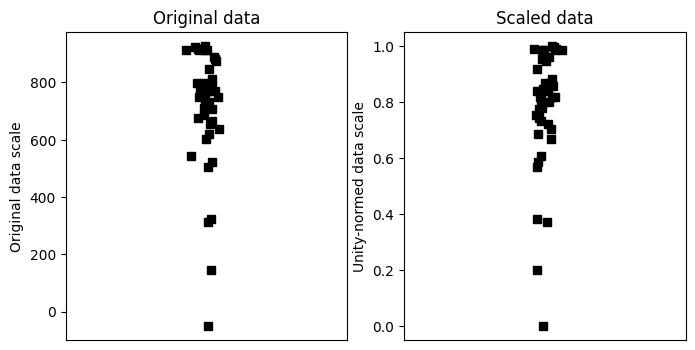

In [12]:
## create some data

N = 42
data = np.log(np.random.rand(N))*234 + 934

# get min and max
dataMin = min(data)
dataMax = max(data)

# now min-max scale
dataS = (data-dataMin) / (dataMax-dataMin)


# now plot
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(1+np.random.randn(N)/20,data,'ks')
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Original data scale')
ax[0].set_title('Original data')

ax[1].plot(1+np.random.randn(N)/20,dataS,'ks')
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity-normed data scale')
ax[1].set_title('Scaled data')

plt.show()

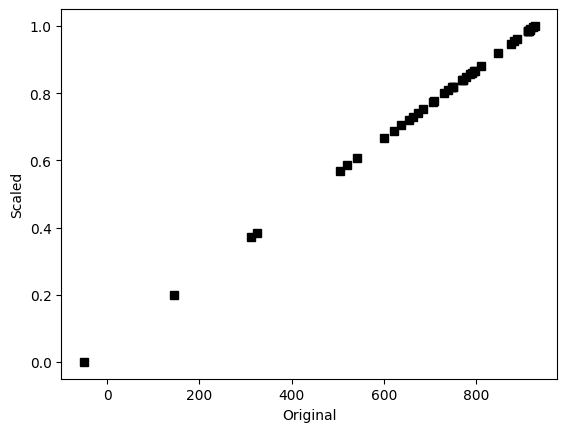

In [13]:
## show that scaling doesn't affect the relative values

plt.plot(data,dataS,'ks')
plt.xlabel('Original')
plt.ylabel('Scaled')
plt.show()

In [14]:
## any abitrary data range

# step 1 is to [0,1] normalize as above

# step 2:
newMin = 4
newMax = 8.7

dataSS = dataS*(newMax-newMin) + newMin

# test it!
print([min(dataSS), max(dataSS)])


[4.0, 8.7]


---
# Code challenge: Invert the min-max scaling
---

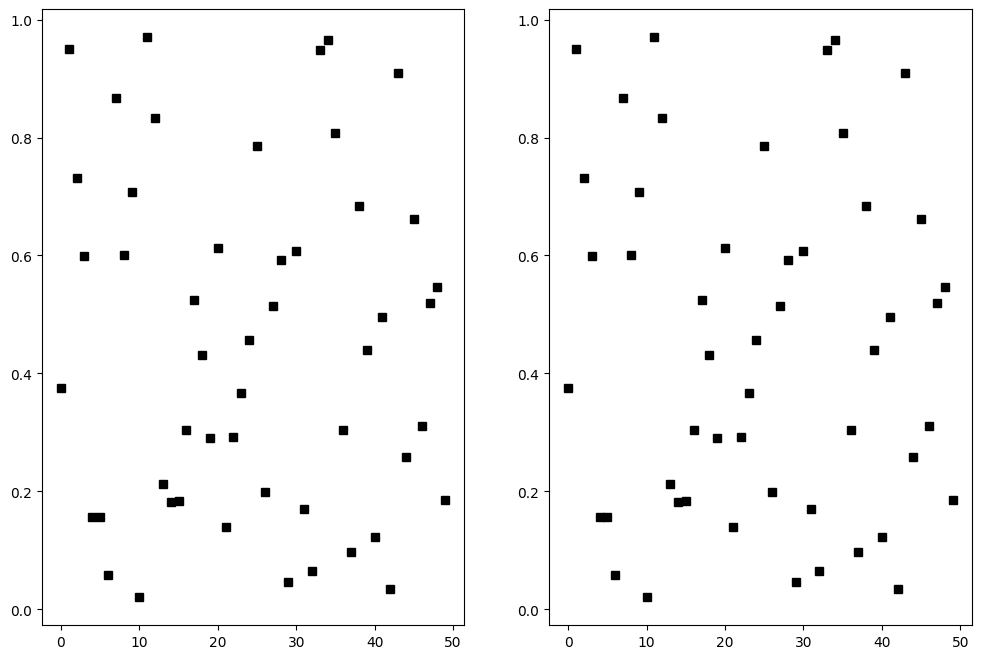

In [19]:
np.random.seed(42)
a = 21
b = 42
data = np.random.rand(50)

dataN = a + ((data - np.min(data)) / (np.max(data) - np.min(data)) * (b - a))

data2 = (((dataN - a) / (b - a)) * (np.max(data) - np.min(data))) + np.min(data)

fig, ax = plt.subplots(1, 2, figsize=(12,8))

ax[0].plot(data, 'ks')
ax[1].plot(data2, 'ks')
plt.show()

Original and recovered data match.


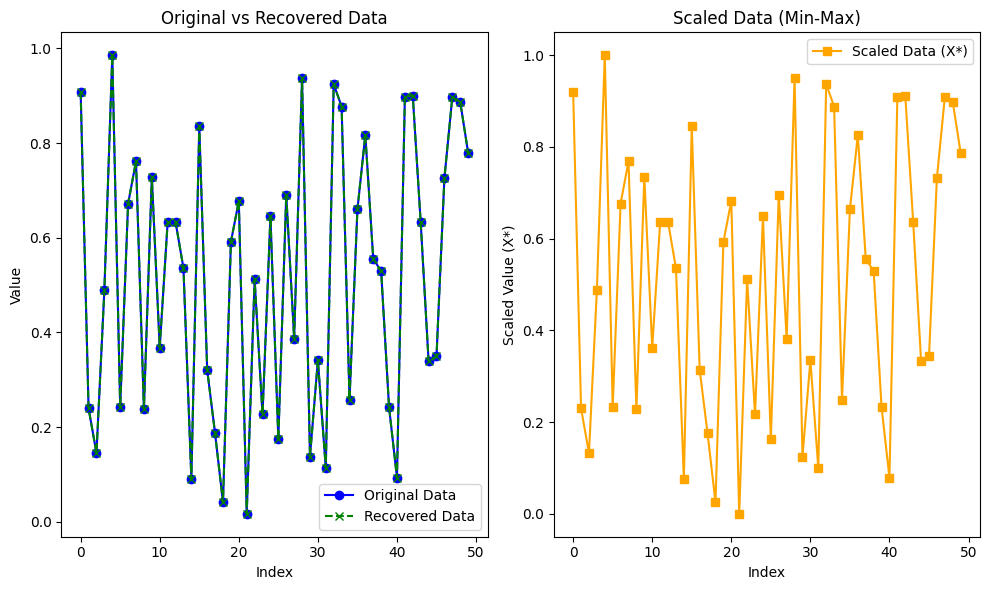

In [23]:

# Step 1: Define the min-max scaling function
def min_max_scale(X, a, b):
    X_min = np.min(X)
    X_max = np.max(X)
    X_star = a + (X - X_min) / (X_max - X_min) * (b - a)
    return X_star, X_min, X_max

# Step 2: Define the function to reverse the scaling
def inverse_min_max_scale(X_star, X_min, X_max, a, b):
    X_original = X_min + (X_star - a) * (X_max - X_min) / (b - a)
    return X_original

# Example usage
X = np.random.rand(50)
a, b = 0, 1  # New scaling range

# Scale the data
X_star, X_min, X_max = min_max_scale(X, a, b)
# print("Scaled data (X*):", X_star)

# Invert the scaling to recover original data
X_recovered = inverse_min_max_scale(X_star, X_min, X_max, a, b)
# print("Recovered original data (X):", X_recovered)

# Verify the recovery is correct (allowing for small numerical differences)
if np.allclose(X, X_recovered, atol=1e-12):
    print("Original and recovered data match.")
else:
    print("Data does not match.")

# Plotting the data
plt.figure(figsize=(10, 6))

# Original data plot
plt.subplot(1, 2, 1)
plt.plot(X, 'o-', label='Original Data', color='blue')
plt.plot(X_recovered, 'x--', label='Recovered Data', color='green')
plt.title('Original vs Recovered Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Scaled data plot
plt.subplot(1, 2, 2)
plt.plot(X_star, 's-', label='Scaled Data (X*)', color='orange')
plt.title('Scaled Data (Min-Max)')
plt.xlabel('Index')
plt.ylabel('Scaled Value (X*)')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()